<a href="https://colab.research.google.com/github/elazzaouisofiane/01DataMiningTest/blob/main/3LosticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

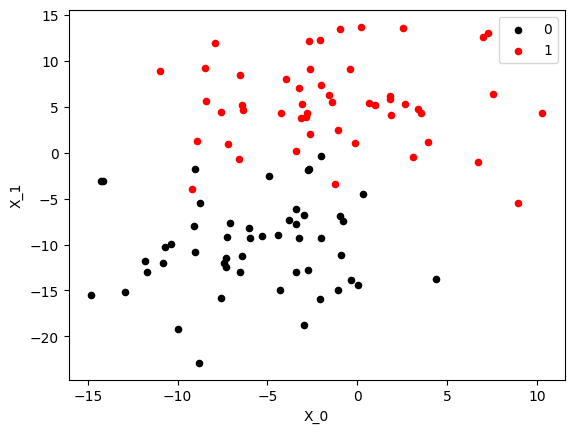

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
X, Y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 100

df = DataFrame(dict(x=X[:,0], y=X[:,1],label=Y))
colors = {0:'black', 1: 'red'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hx(w,X):
       z = np.array(w[0] + w[1] * np.array(X[0]) + w[2] * np.array(X[:,1]))
       return sigmoid(z)

def cost(w,X,Y):
    y_pred = hx(w,X)
    return -1 * sum(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))

def grad(w,X,Y):
  y_pred = hx(w,X)
  g = [0]*3
  g[0] = -1 * sum(Y*(1-y_pred)) - (1-Y)*sum(y_pred)
  g[1] = -1 * sum(Y*(1-y_pred)*X[0]) - (1-Y)*sum(y_pred*X[:,0])
  g[2] = -1 * sum(Y*(1-y_pred)*X[1]) - (1-Y)*sum(y_pred*X[:,1])
  return g

def descent(w_new, w_prev, lr):
  print(w_prev)
  print(cost(w_prev, X, Y))
  j=0
  while True:
    w_prev = w_new
    w0 = w_prev[0] - lr* grad(w_prev, X,Y)[0]
    w1 = w_prev[1] - lr* grad(w_prev, X,Y)[1]
    w2 = w_prev[2] - lr* grad(w_prev, X,Y)[2]
    w_new = [w0, w1, w2]
    print(w_new)
    print(cost(w_new, X, Y))
    if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
      return w_new

    if j>100:
      return w_new
    j+=1

w=[1,1,1]
w=descent(w,w,.0099)
print(w)


[1, 1, 1]


ValueError: operands could not be broadcast together with shapes (2,) (100,) 